<a href="https://colab.research.google.com/github/ujjawal-kumar17/Stress-Analysis/blob/main/Adult_stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Then you can read it in using pandas
  stressAdult = pd.read_csv(fn)

Saving Adult_dataset.csv to Adult_dataset.csv
User uploaded file "Adult_dataset.csv" with length 49854 bytes


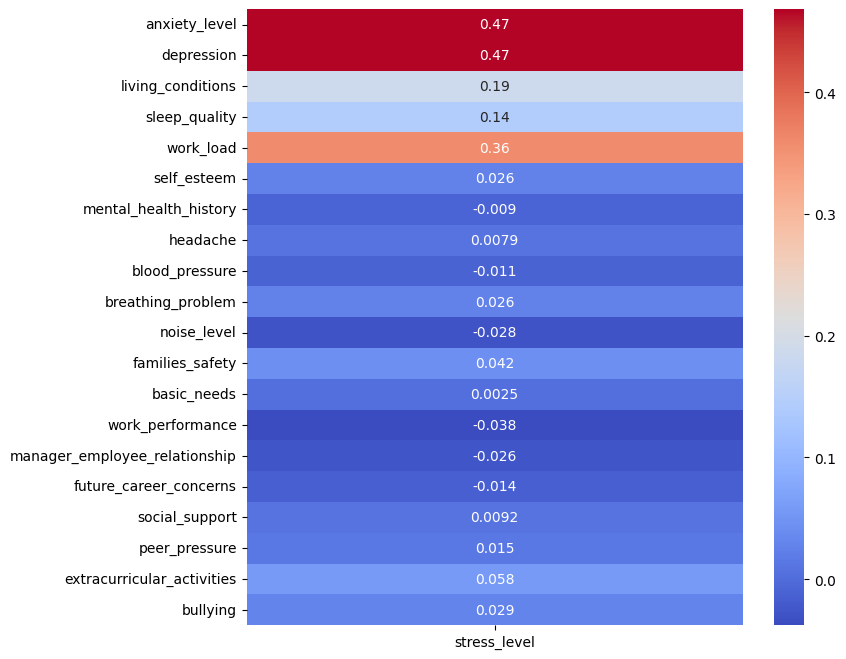

In [ ]:
correl = stressAdult.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correl.iloc[:-1,-1:], annot = True, cmap = sns.color_palette("coolwarm", as_cmap=True));

In [ ]:
print("There are", len(stressAdult), "Adult in the dataset.")
print("The avarage anxiety level is:", round(stressAdult.anxiety_level.mean(),2))
print(len(stressAdult.loc[stressAdult.mental_health_history == 1]), "Adult reported a history of mental health issues.")

There are 1100 Adult in the dataset.
The avarage anxiety level is: 15.11
546 Adult reported a history of mental health issues.


In [ ]:
below_avarage = len(stressAdult.loc[stressAdult["self_esteem"] < stressAdult["self_esteem"].mean()])
print(below_avarage, "Adults have self esteem below avarage")
depressed = len(stressAdult.loc[stressAdult["depression"] >= 10])
print(round((depressed/len(stressAdult))*100,2), "% of Adults reported moderate or higher levels of depression.")

554 Adults have self esteem below avarage
67.64 % of Adults reported moderate or higher levels of depression.


In [ ]:
print(len(stressAdult.loc[stressAdult["headache"] >2]), "Adults experience headaches frequently.")
print(len(stressAdult.loc[stressAdult["sleep_quality"] < 3]), "Adults have bad sleep quality.")

import pandas as pd

# Define the mapping of category values to blood pressure values
blood_pressure_mapping = {1: (90, 60), 2: (110, 75), 3: (130, 90)}

# Create systolic and diastolic columns using map
#stressAdult['systolic'] = stressAdult['blood_pressure'].map(lambda x: blood_pressure_mapping[x][0])
for index, row in stressAdult.iterrows():
    blood_pressure = row['blood_pressure']
    if blood_pressure in blood_pressure_mapping:
        stressAdult.loc[index, 'systolic'] = blood_pressure_mapping[blood_pressure][0]
for index, row in stressAdult.iterrows():
    blood_pressure = row['blood_pressure']
    if blood_pressure in blood_pressure_mapping:
        stressAdult.loc[index, 'diastolic'] = blood_pressure_mapping[blood_pressure][1]
#stressAdult['diastolic'] = stressAdult['blood_pressure'].map(lambda x: blood_pressure_mapping[x][1])

# Calculate the mean systolic and diastolic blood pressure
mean_systolic = stressAdult['systolic'].mean()
mean_diastolic = stressAdult['diastolic'].mean()

# Display the result
print("The average blood pressure is: {}/{}".format(round(mean_systolic, 1), round(mean_diastolic, 1)))

551 Adults experience headaches frequently.
547 Adults have bad sleep quality.
The average blood pressure is: 108.8/74.1


In [ ]:
print(len(stressAdult.loc[stressAdult["noise_level"] >= 4]),"Adults live in high noise level areas.")
print(round((len(stressAdult.loc[stressAdult["living_conditions"] <= 1])/len(stressAdult))*100,2),"% of Adults feel unsafe in their living conditions.", sep = "")
print(len(stressAdult.loc[stressAdult["basic_needs"] <= 2]),"Adults reported, that their basic needs didn't met.")

357 Adults live in high noise level areas.
34.64% of Adults feel unsafe in their living conditions.
542 Adults reported, that their basic needs didn't met.


In [ ]:
print(len(stressAdult.loc[stressAdult["work_performance"] < stressAdult["work_performance"].mean()]), "Adults rate their academic performance below avarage.")
print("The avarage study load reported by the students is ", round(stressAdult["work_load"].mean(),2)," on a range of 0-5.", sep = "")
print(len(stressAdult.loc[stressAdult["future_career_concerns"]>= 4]), "Adults have high concerns about their future careers.")

569 Adults rate their academic performance below avarage.
The avarage study load reported by the students is 2.45 on a range of 0-5.
366 Adults have high concerns about their future careers.


In [ ]:
print(len(stressAdult.loc[stressAdult["social_support"]>= 2]), "Adults feel they have strong social support.")
print(round((len(stressAdult.loc[stressAdult["bullying"] > 0])/len(stressAdult))*100,2),"% of Adults have experienced bullying.", sep = "")
print(f"{len(stressAdult.loc[stressAdult['extracurricular_activities'] > 0])} Adults participate in extracurricular activities.")

734 Adults feel they have strong social support.
84.73% of Adults have experienced bullying.
907 Adults participate in extracurricular activities.


In [ ]:
ac_perf = round(stressAdult["anxiety_level"].corr(stressAdult["work_performance"]),2)
print("The correlation between anxiety level and academic perofmance is ", ac_perf,". This is a moderate negative correlation, based on this the people who think they perform better also experience less anxiety.", sep = "" )
sleep_dep = round(stressAdult["sleep_quality"].corr(stressAdult["depression"]),2)
print("The correlation between depression and sleep quality is ", sleep_dep,". This is a moderate/strong negative correlation, people who sleep better less likely to report higher levels of depression.", sep = "")
bull_mental = round(stressAdult["bullying"].corr(stressAdult["mental_health_history"]), 2)
print("The correlation between bullying and history of mental illness is ",bull_mental,". This is a moderate positive correlation, people who are the victims of bullying also more likely to have history of mental illness.", sep = "")

The correlation between anxiety level and academic perofmance is -0.06. This is a moderate negative correlation, based on this the people who think they perform better also experience less anxiety.
The correlation between depression and sleep quality is -0.03. This is a moderate/strong negative correlation, people who sleep better less likely to report higher levels of depression.
The correlation between bullying and history of mental illness is 0.01. This is a moderate positive correlation, people who are the victims of bullying also more likely to have history of mental illness.


In [ ]:
#Separate the mental factor columns
mental_pos = stressAdult[["anxiety_level", "depression", "self_esteem", "mental_health_history"]]
#Create a dictionary
mental_pos_count = {}
#Iterate over the pyschological factor columns
for column,row in mental_pos.items():
    #If it is anxiety or depression we count the people who are in the upper 40%
    if column == "anxiety_level" or column == "depression":
        count = (row > np.percentile(mental_pos[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #Everyone who had history with mental diseases get counted
    elif column == "mental_health_history":
        count = row == 1
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
    #People who are in the lower 40% get counted for self-esteem
    else:
        count = (row < np.percentile(mental_pos[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        mental_pos_count[column] = count
#Create a pandas dataframe
mental_pos_df = pd.DataFrame(mental_pos_count)
#Count every row where atleast one value is true
mental_number = len((mental_pos_df[(mental_pos_df >= 1).sum(axis=1) >= 1]))

In [ ]:
#Separate the physical factor columns
physical = stressAdult[["headache", "blood_pressure", "sleep_quality", "breathing_problem"]]
#Create a dictionary
physical_dict = {}
#Iterate over the physical factor columns
for column,row in physical.items():
    #People in the upper 40% for headache, breathing problems or blood pressure get counted
    if column == "headache" or column == "breathing problem" or column == "blood_pressure":
        count = (row > np.percentile(physical[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(physical[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        physical_dict[column] = count
#Create a pandas dataframe
physical_df = pd.DataFrame(physical_dict)
#Count every row where atleast one value is true
physical_number = len((physical_df[(physical_df >= 1).sum(axis=1) >= 1]))

In [ ]:
#Separate the environmental factor columns
env = stressAdult[["living_conditions", "families_safety", "basic_needs", "noise_level"]]
#Create a dictionary
env_dict = {}
#Iterate over the environmental factor columns
for column,row in env.items():
    #People in the upper 40% for noise level get counted
    if column == "noise_level":
        count = (row > np.percentile(env[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
    #People in the lower 40% for sleep quality get counted
    else:
        count = (row < np.percentile(env[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        env_dict[column] = count
#Create a pandas dataframe
env_df = pd.DataFrame(env_dict)
#Count every row where atleast one value is true
env_number = len((env_df[(env_df >= 1).sum(axis=1) >= 1]))

In [ ]:
#Separate the academic factor columns
acad = stressAdult[["work_performance", "work_load", "manager_employee_relationship", "future_career_concerns"]]
#Create a dictionary
acad_dict = {}
#Iterate over the academic factor columns
for column,row in acad.items():
    #People in the upper 40% for study load and future career concerns get counted
    if column == "work_load" or column == "future_career_concerns":
        count = (row > np.percentile(acad[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
    #People in the lower 40% for academic performance or teacher student relationship get counted
    else:
        count = (row < np.percentile(acad[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        acad_dict[column] = count
#Create a pandas dataframe
acad_df = pd.DataFrame(acad_dict)
#Count every row where atleast one value is true
acad_number = len((acad_df[(acad_df >= 1).sum(axis=1) >= 1]))

In [ ]:
#Separate the social factor columns
social = stressAdult.iloc[:, 16:20]
#Create a dictionary
social_dict = {}
#Iterate over the academic factor columns
for column,row in social.items():
    #People in the upper 40% for peer pressure, extracurricular activities and bullying get counted
    if column == "peer_pressure" or column == "extracurricular_activities" or column == "bullying":
        count = (row > np.percentile(social[column],60))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
    #People in the lower 40% for social support get counted
    else:
        count = (row < np.percentile(social[column],40))
        #Add the resulting dataset to the dictionary under the column's name
        social_dict[column] = count
#Create a pandas dataframe
social_df = pd.DataFrame(social_dict)
#Count every row where atleast one value is true
social_number = len((social_df[(social_df >= 1).sum(axis=1) >= 1]))

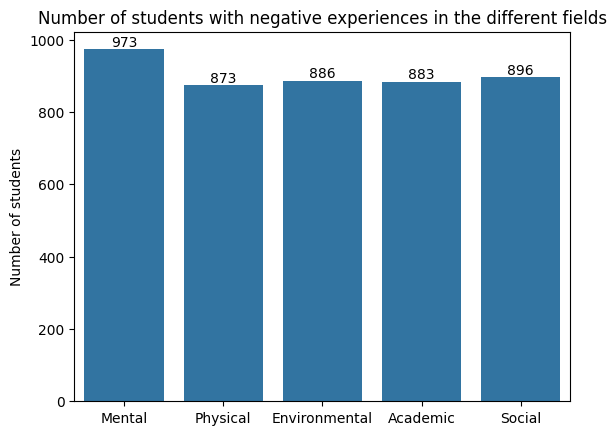

In [ ]:
#Create a pandas series from the numbers
neg = pd.Series([mental_number, physical_number, env_number, acad_number, social_number])
#Choose column names
col_names = ["Mental", "Physical", "Environmental", "Academic", "Social"]
#Create the barplot
ax = sns.barplot(x = col_names, y = neg.values)
#Name the plot
ax.set(title="Number of students with negative experiences in the different fields")
#Show the number on top of the bar
ax.bar_label(ax.containers[0])
#Set the y label
ax.set_ylabel("Number of students");

In [ ]:
#Choose which factor has the biggest impact on stress level within each variable subgroup.
print("In mental variables", round(correl.iloc[-1:,0:4].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In physical variables", round(correl.iloc[-1:,4:8].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In environmental variables", round(correl.iloc[-1:,8:12].abs().max(),2).index.max()), "has the biggest impact."
print("In academic variables", round(correl.iloc[-1:,12:16].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")
print("In social variables", round(correl.iloc[-1:,16:20].abs().max(),2).index.max().replace("_", " "), "has the biggest impact.")

In mental variables sleep quality has the biggest impact.
In physical variables work load has the biggest impact.
In environmental variables noise_level
In academic variables work performance has the biggest impact.
In social variables social support has the biggest impact.


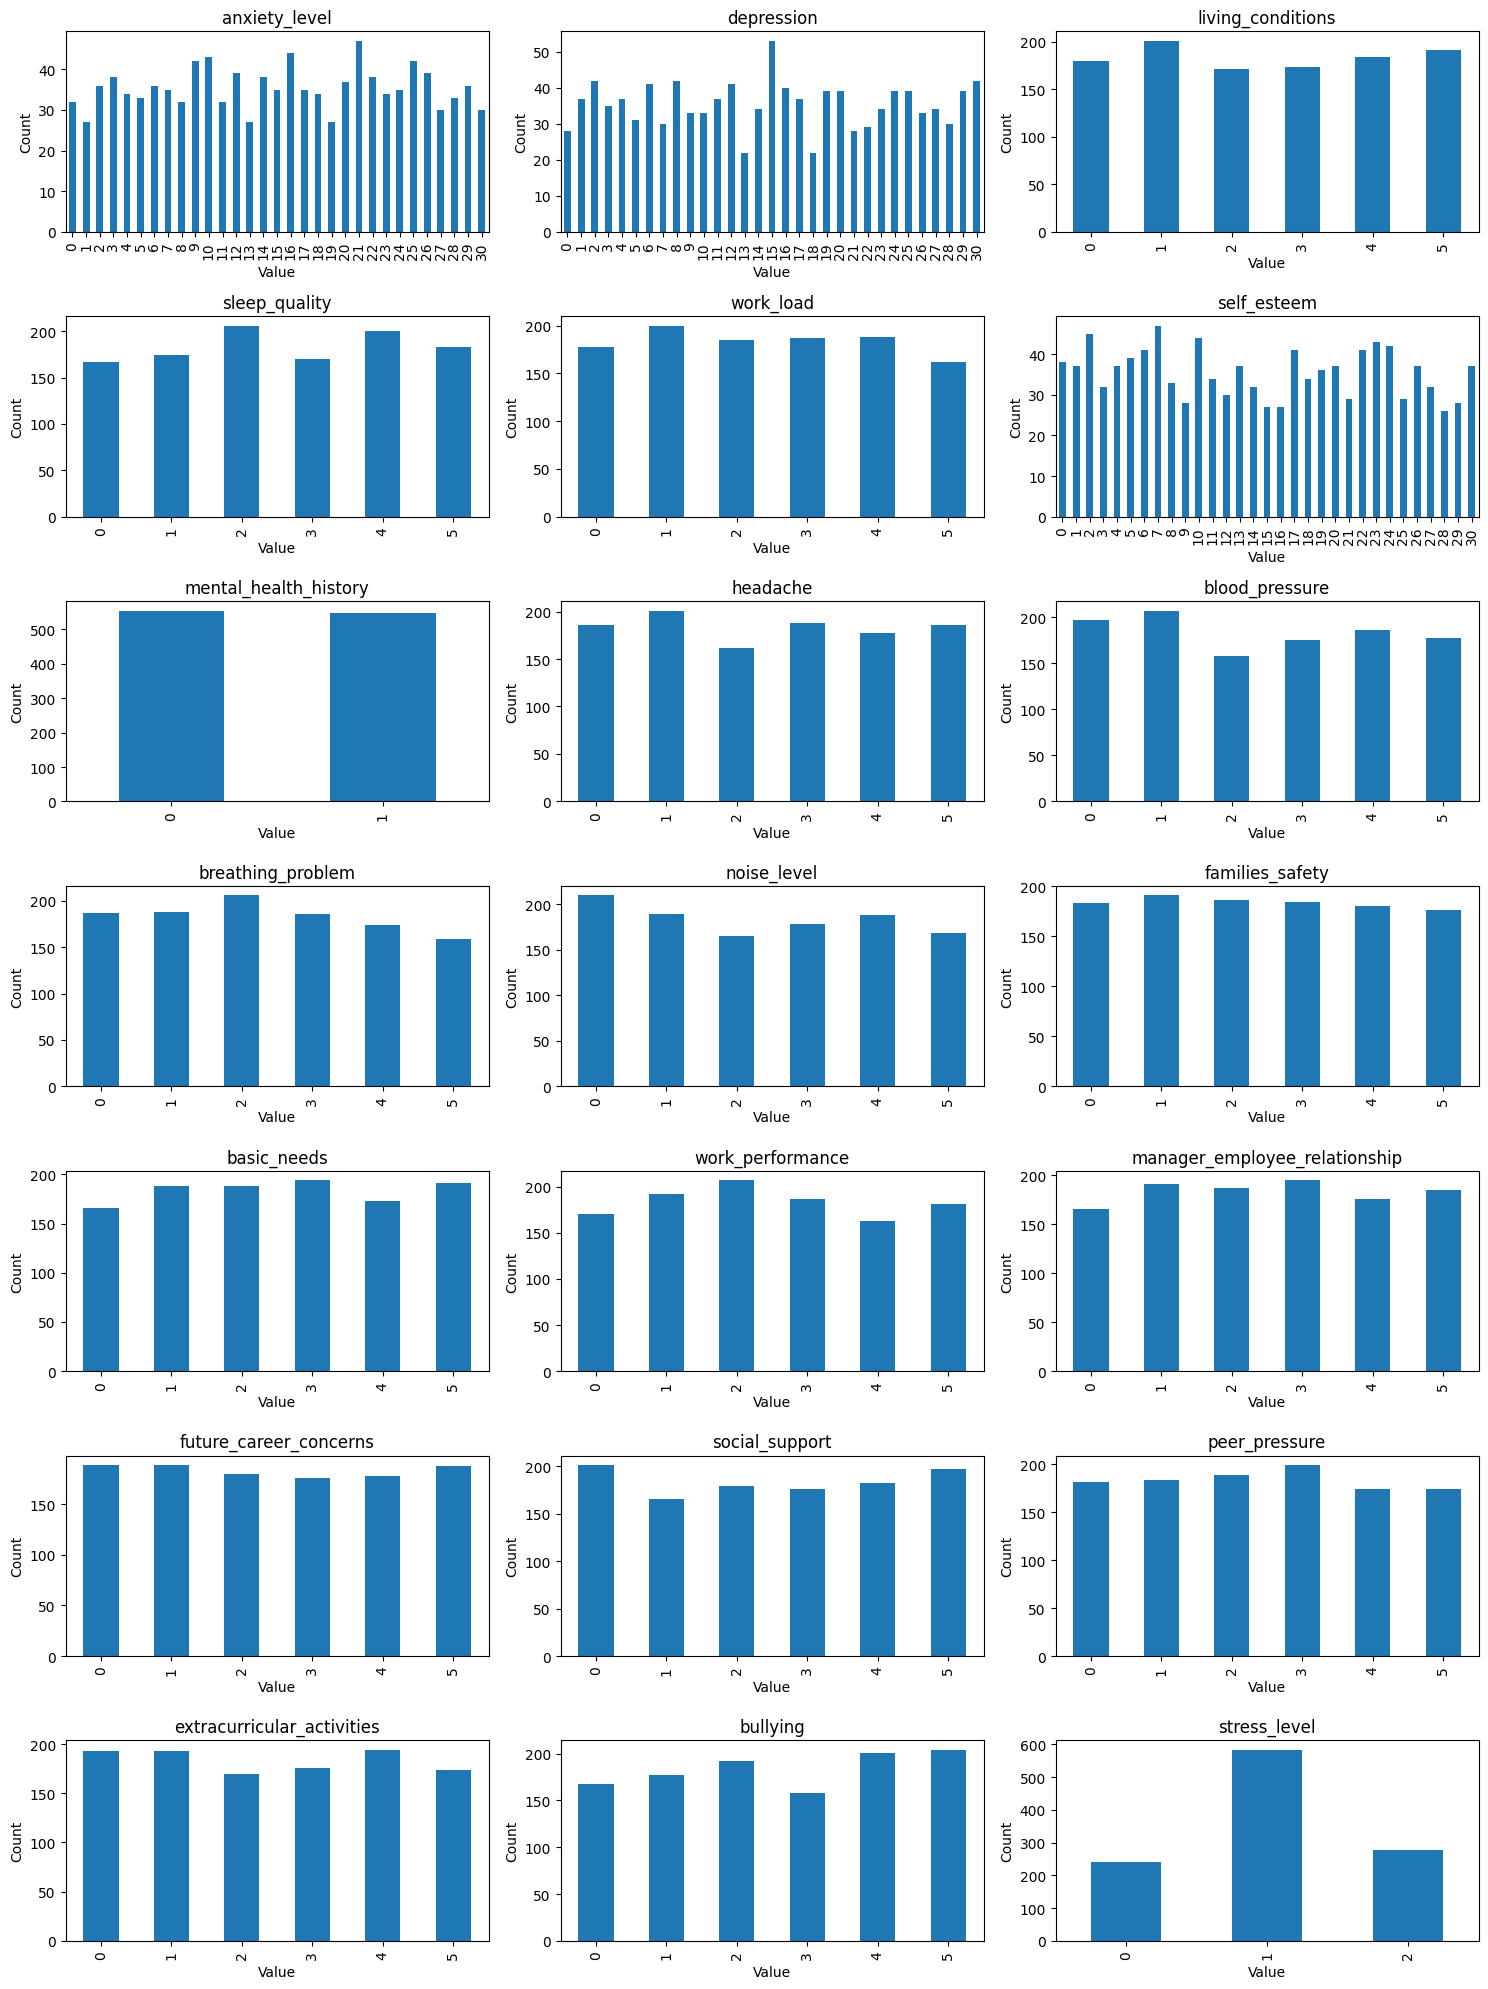

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecting features
selected_features = stressAdult.columns[:-1]  # Exclude the 'stress_level'

# Setting up subplots
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Plotting bar charts for each feature
for i, feature in enumerate(selected_features):
    if i < 21:  # Limit the number of subplots to the available space
        row, col = divmod(i, 3)
        ax = axes[row, col]
        stressAdult[feature].value_counts().sort_index().plot(kind='bar', ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')

plt.tight_layout()

# Display the plots
plt.show()

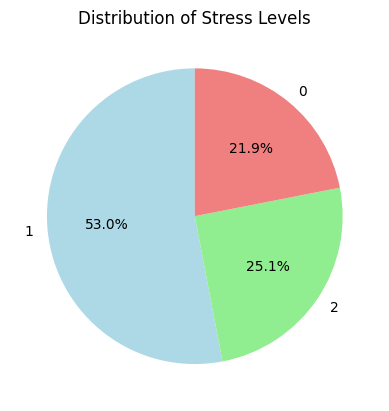

In [ ]:
import matplotlib.pyplot as plt

stressAdult['stress_level'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Stress Levels')
plt.ylabel('')
plt.show()

In [ ]:
selected_features = stressAdult.columns[:-1]  # Exclude the 'stress_level' column

statistics = stressAdult[selected_features].describe().transpose()

# Adding skewness and kurtosis to the statistics
statistics['skewness'] = stressAdult[selected_features].skew()
statistics['kurtosis'] = stressAdult[selected_features].kurt()
print(statistics)

                                count        mean        std   min   25%  \
anxiety_level                  1100.0   15.107273   8.784310   0.0   8.0   
depression                     1100.0   15.014545   8.966816   0.0   7.0   
living_conditions              1100.0    2.502727   1.725206   0.0   1.0   
sleep_quality                  1100.0    2.555455   1.684813   0.0   1.0   
work_load                      1100.0    2.448182   1.676266   0.0   1.0   
self_esteem                    1100.0   14.580909   8.981013   0.0   7.0   
mental_health_history          1100.0    0.496364   0.500214   0.0   0.0   
headache                       1100.0    2.479091   1.722970   0.0   1.0   
blood_pressure                 1100.0    2.433636   1.732879   0.0   1.0   
breathing_problem              1100.0    2.408182   1.670198   0.0   1.0   
noise_level                    1100.0    2.410000   1.731812   0.0   1.0   
families_safety                1100.0    2.468182   1.698334   0.0   1.0   
basic_needs 

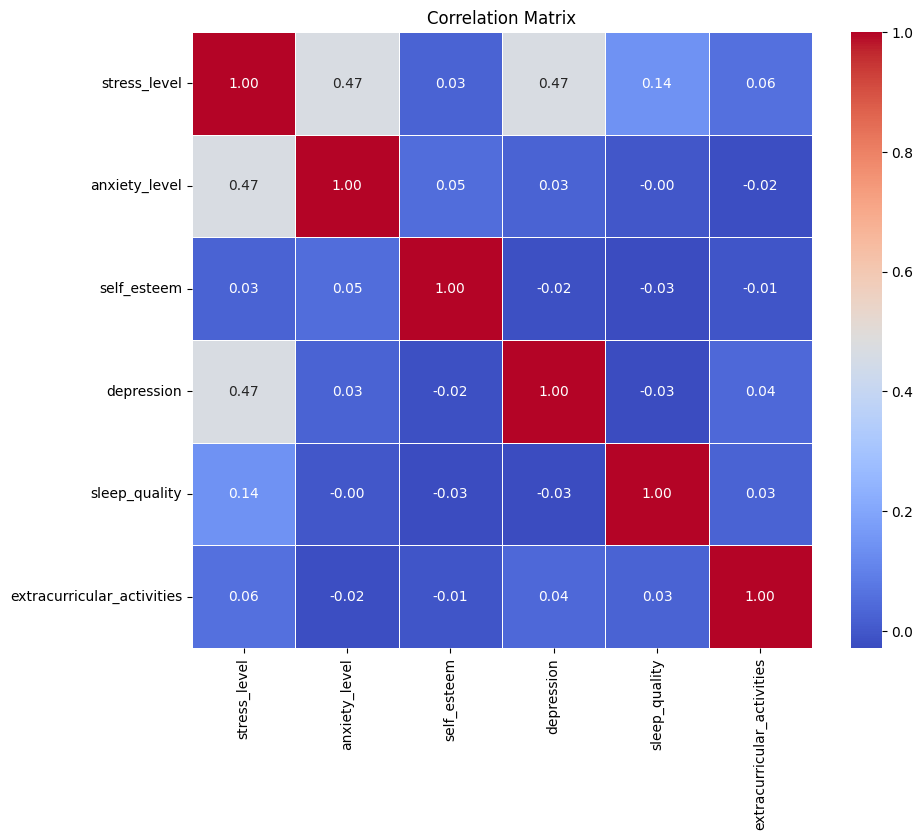

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = stressAdult[['stress_level', 'anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'extracurricular_activities']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

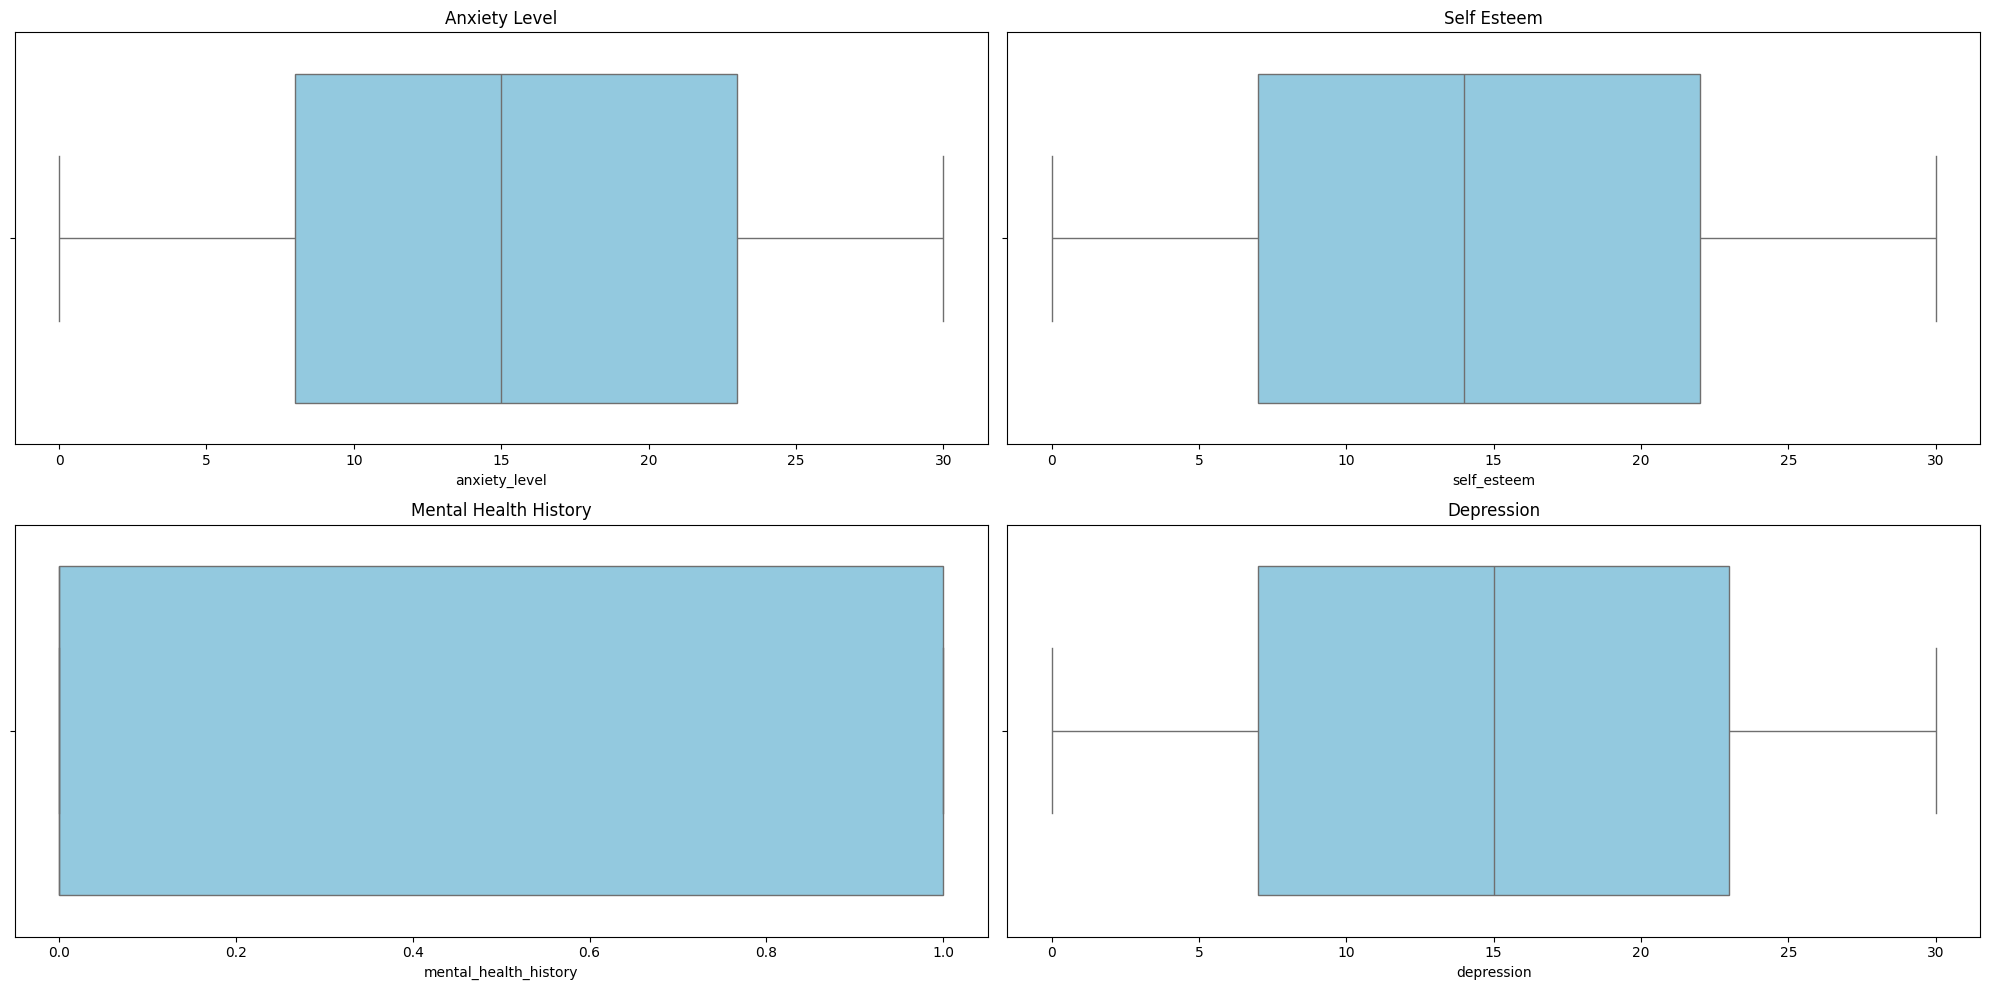

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to create box plots for
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Loop through features and create box plots
for i, feature in enumerate(features):
    row, col = divmod(i, 2)  # divmod returns quotient and remainder
    sns.boxplot(x=stressAdult[feature], ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

In [ ]:
stressAdult.isnull().sum()

anxiety_level                      0
depression                         0
living_conditions                  0
sleep_quality                      0
work_load                          0
self_esteem                        0
mental_health_history              0
headache                           0
blood_pressure                     0
breathing_problem                  0
noise_level                        0
families_safety                    0
basic_needs                        0
work_performance                   0
manager_employee_relationship      0
future_career_concerns             0
social_support                     0
peer_pressure                      0
extracurricular_activities         0
bullying                           0
stress_level                       0
systolic                         560
diastolic                        560
dtype: int64

In [ ]:
# # Remove rows with any NaN values
# stressAdult_clean = stressAdult[~np.isnan(stressAdult).any(axis=1)]

# # Fit KBinsDiscretizer on the cleaned data
# est.fit(stressAdult_clean.reshape(-1, 1))


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Perform data imputation on the stressAdult DataFrame
imputed_stressAdult = pd.DataFrame(imputer.fit_transform(stressAdult), columns=stressAdult.columns)

# Create categorical variables from numerical data
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
categorical_data = pd.DataFrame(k_bins.fit_transform(imputed_stressAdult), columns=imputed_stressAdult.columns)

# Perform a chi-square test
chi2_results = {}
for column in categorical_data.columns:
    contingency_table = pd.crosstab(categorical_data[column], stressAdult['stress_level'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi2 Statistic': chi2_stat, 'p-value': p_value}

chi2_results_stress = pd.DataFrame(chi2_results).T

print("\nchi2_results:")
print(chi2_results_stress)


chi2_results:
                               Chi2 Statistic       p-value
anxiety_level                      254.655955  6.463733e-54
depression                         237.349429  3.453256e-50
living_conditions                   48.989808  5.867481e-10
sleep_quality                       26.188889  2.898699e-05
work_load                          134.202990  4.913009e-28
self_esteem                          2.749671  6.005512e-01
mental_health_history                0.384383  8.251487e-01
headache                             2.225067  6.944427e-01
blood_pressure                       9.055820  5.971930e-02
breathing_problem                    7.695826  1.033778e-01
noise_level                          1.286148  8.637214e-01
families_safety                      2.176709  7.032956e-01
basic_needs                          4.602158  3.306054e-01
work_performance                     3.035570  5.518905e-01
manager_employee_relationship        3.792584  4.348037e-01
future_career_concerns   

In [ ]:
'''  Original
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Create categorical variables from numerical data
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
categorical_data = pd.DataFrame(k_bins.fit_transform(stressAdult), columns=stressAdult.columns)

# Perform a chi-square test
chi2_results = {}
for column in categorical_data.columns:
    contingency_table = pd.crosstab(categorical_data[column], stressAdult['stress_level'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'Chi2 Statistic': chi2_stat, 'p-value': p_value}

chi2_results_stress = pd.DataFrame(chi2_results).T

print("\nchi2_results:")
print(chi2_results_stress)'''

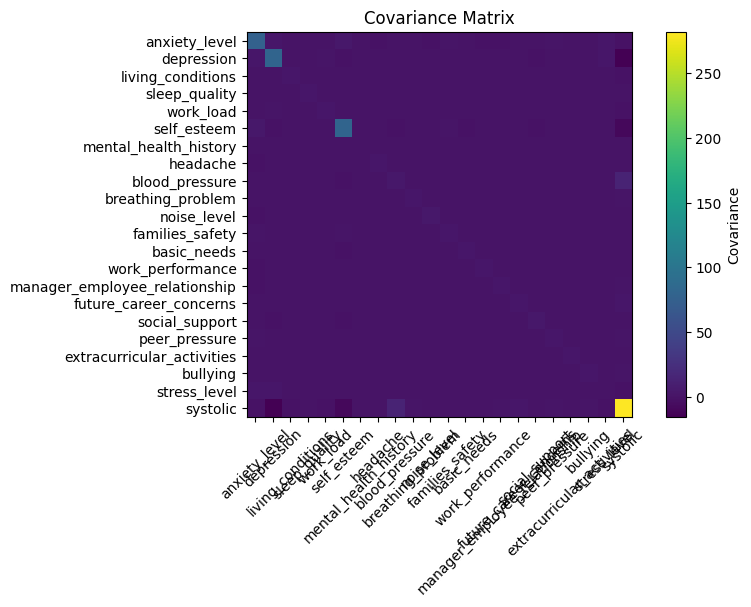

In [ ]:
selected_features = stressAdult.columns[:-1]  # Exclude the 'stress_level' column

# Covariance matrix
cov_matrix = stressAdult[selected_features].cov()

plt.figure(figsize=(9, 5))
plt.imshow(cov_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Covariance')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.yticks(range(len(selected_features)), selected_features)
plt.title('Covariance Matrix')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
# ANOVA
categorical_variable = 'work_performance'

anova_results = {}
for continuous_variable in selected_features:
    if continuous_variable != categorical_variable:
        group_data = [stressAdult[stressAdult[categorical_variable] == group][continuous_variable] for group in stressAdult[categorical_variable].unique()]
        f_stat, p_value = f_oneway(*group_data)
        anova_results[continuous_variable] = {'F-statistic': f_stat, 'p-value': p_value}

anova_stress = pd.DataFrame(anova_results).T

# Displaying ANOVA results
print("\nANOVA results:")
print(anova_stress)


ANOVA results:
                               F-statistic   p-value
anxiety_level                     1.310411  0.257035
depression                        0.357610  0.877497
living_conditions                 0.639093  0.669924
sleep_quality                     1.133503  0.340653
work_load                         1.228383  0.293480
self_esteem                       0.446068  0.816328
mental_health_history             0.422447  0.833286
headache                          0.479717  0.791587
blood_pressure                    0.433403  0.825468
breathing_problem                 0.636967  0.671556
noise_level                       0.909069  0.474265
families_safety                   1.468416  0.197396
basic_needs                       0.611036  0.691491
manager_employee_relationship     0.954539  0.444738
future_career_concerns            0.850509  0.513996
social_support                    1.599536  0.157369
peer_pressure                     0.554877  0.734677
extracurricular_activities    

In [ ]:
from scipy.stats import zscore, norm
import scipy.stats as stats
import numpy as np

# Specify the variable for which you want to perform the Z-test
Target = 'anxiety_level'

# Extract the data for the specific category of 'academic_performance'
category_data = stressAdult[stressAdult['work_performance'] == 1][Target]

# Calculate the Z-scores
z_scores = zscore(category_data)

# Define the significance level (e.g., 0.05)
alpha = 0.05

# Calculate the critical Z-value for a two-tailed test
critical_z = norm.ppf(1 - alpha / 2)

# Calculate the test statistic
test_statistic = z_scores.mean()

# Compare the test statistic to the critical Z-value
if np.abs(test_statistic) > critical_z:
    print(f"The Z-test result is statistically significant for {Target} in academic performance.")
else:
    print(f"The Z-test result is not statistically significant for {Target} in academic performance.")

# Calculate the p-values for each Z-score
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))
# Hypothesis testing for each p-value
if any(p_values < alpha):
    print("Reject Null Hypothesis for at least one observation.")
else:
    print("Fail to Reject Null Hypothesis for all observations.")

The Z-test result is not statistically significant for anxiety_level in academic performance.
Fail to Reject Null Hypothesis for all observations.


In [ ]:

from sklearn.impute import SimpleImputer

# Create an imputer object that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Perform data imputation on the stressAdult DataFrame
imputed_stressAdult = pd.DataFrame(imputer.fit_transform(stressAdult), columns=stressAdult.columns)

# Perform Linear Discriminant Analysis
model = lda(n_components=1)
newData = model.fit_transform(imputed_stressAdult.drop('stress_level', axis=1), imputed_stressAdult['stress_level'])

# Creating a DataFrame with meaningful column names
newData = pd.DataFrame({'LD1': newData[:, 0], 'stress_level': imputed_stressAdult['stress_level'], 'y': 0})
model.explained_variance_ratio_

array([0.9875304])

In [ ]:
'''Original code
import plotly.express as pex
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import pandas as pd

# Suppressing the FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)


    model = lda(n_components=1)
    newData = model.fit_transform(stressAdult.drop('stress_level', axis=1), stressAdult['stress_level'])

# Creating a DataFrame with meaningful column names
newData = pd.DataFrame({'LD1': newData[:, 0], 'stress_level': stressAdult['stress_level'], 'y': 0})
model.explained_variance_ratio_'''

In [ ]:
fig = pex.scatter(newData, x='LD1', y='y', color='stress_level',
                  color_continuous_scale=pex.colors.sequential.Viridis,title='LDA - Scatter Plot')
fig.show()

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Perform data imputation on the stressAdult DataFrame
imputed_stressAdult = pd.DataFrame(imputer.fit_transform(stressAdult), columns=stressAdult.columns)

# Calculate the covariance matrix
cov_matrix = np.cov(imputed_stressAdult.drop('stress_level',axis=1), rowvar=False)

# Calculate the eigenvalues and eigenvectors
values, vectors = np.linalg.eig(cov_matrix)

print("Values shape: " + str(values.shape))
print("Vectors shape: " + str(vectors.shape))

Values shape: (22,)
Vectors shape: (22, 22)


In [ ]:
''' Original
cov_matrix = np.cov(stressAdult.drop('stress_level',axis=1), rowvar=False)
cov_matrix.shape
(30, 30)
values, vectors = np.linalg.eig(cov_matrix)
print("Values shape: " + str(values.shape))
print("Vectors shape: " + str(vectors.shape))'''

LinAlgError: Array must not contain infs or NaNs

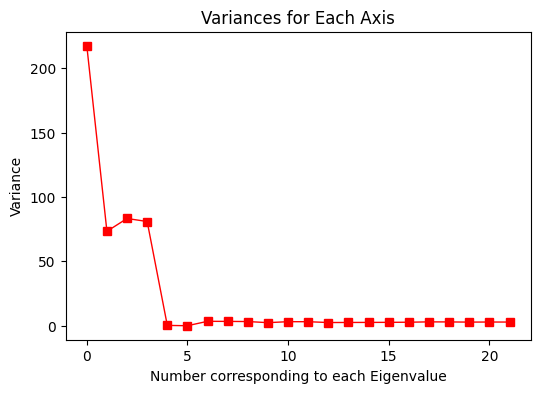

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(values,marker='s',color='red',lw=1)
plt.xlabel('Number corresponding to each Eigenvalue')
plt.ylabel('Variance')
plt.title('Variances for Each Axis')
plt.show()

In [ ]:
#Take the top 3 eigenvectors and project data onto them.
top_3_vectors = vectors[:,np.array([0,1,2])]
# Project data down to 3 axes by computing dot product
principal_comp = np.dot(stressAdult.drop('stress_level',axis=1).values, top_3_vectors)
print(principal_comp.shape) #Correct shape

(1100, 3)


In [ ]:
pex.scatter_3d(x=principal_comp[:,0],y=principal_comp[:,1],z=principal_comp[:,2],color=stressAdult.stress_level, color_continuous_scale=pex.colors.sequential.Viridis)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
stress_imputed = imputer.fit_transform(stressAdult)

# Standardize the data
scaler = StandardScaler()
stress_standardized = scaler.fit_transform(stress_imputed)

svd = TruncatedSVD(n_components=stressAdult.shape[1], n_iter=100, random_state=42)
svd.fit(stress_standardized)

U_reduced = svd.components_
S_reduced = np.diag(svd.singular_values_)
Vt_reduced = svd.components_

explained_variance = np.cumsum(svd.singular_values_ ** 2) / np.sum(svd.singular_values_ ** 2)

# Choose the number of components to retain
n_components = np.argmax(explained_variance > 0.95) + 1

U_reduced = svd.components_[:, :n_components]
S_reduced = np.diag(svd.singular_values_[:n_components])
Vt_reduced = svd.components_[:n_components, :]

In [ ]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

scaler = StandardScaler()
stress_standardized = scaler.fit_transform(stressAdult)
#stress_normalized = scaler.fit_transform(X)
U, S, Vt = np.linalg.svd(stressAdult, full_matrices=False)
# Calculate the explained variance
explained_variance = np.cumsum(S**2) / np.sum(S**2)

# Choose the number of components to retain
n_components = np.argmax(explained_variance > 0.95) + 1
U_reduced = U[:, :n_components]
S_reduced = np.diag(S[:n_components])
Vt_reduced = Vt[:n_components, :]'''


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
stress_imputed = imputer.fit_transform(stressAdult)

# Perform dimensionality reduction
svd = TruncatedSVD(n_components=2)
stress_reduced_sklearn = svd.fit_transform(stress_imputed)

In [ ]:
stress_reduced = stress_imputed

In [ ]:
'''stress_reduced = np.dot(U_reduced, np.dot(S_reduced, Vt_reduced))
svd = TruncatedSVD(n_components=2)
stress_reduced_sklearn = svd.fit_transform(stressAdult)'''

ValueError: Input X contains NaN.
TruncatedSVD does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming explained_variance is calculated as in the previous example

# Create a scree plot
trace1 = go.Scatter(
    x=list(range(1, len(explained_variance) + 1)),
    y=explained_variance,
    mode='lines+markers',
    name='Explained Variance',
)

layout = go.Layout(
    title='Scree Plot of Explained Variance',
    xaxis=dict(title='Principal Component'),
    yaxis=dict(title='Explained Variance'),
)

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter'}]])
fig.add_trace(trace1)
fig.update_layout(layout)
fig.show()


In [ ]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Data Splitting
X = stressAdult.drop(["stress_level"], axis=1)
y = stressAdult.stress_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling with StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stressAdult, stressAdult['stress_level'], test_size=0.3, random_state=42)

# Create a pipeline that first replaces missing values with the mean, and then trains a GaussianNB classifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', GaussianNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
'''model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stressAdult, stressAdult['stress_level'], test_size=0.3, random_state=42)

# Create a pipeline that first replaces missing values with the mean, and then trains a DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Confusion Matrix:
[[ 69   0   0]
 [  0 177   0]
 [  0   0  84]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       177
           2       1.00      1.00      1.00        84

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [ ]:
'''# Step 1: Create a Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Step 4: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)'''


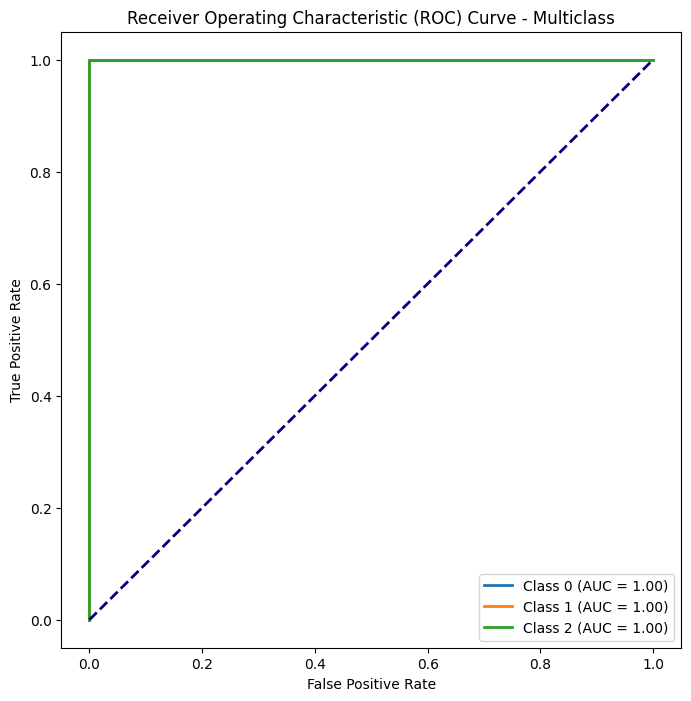

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)

# Replace missing values in X_train and X_test with the mean
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
dt_model.fit(X_train_imputed, y_train)

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)

y_pred_prob = dt_model.predict_proba(X_test_imputed)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(dt_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

In [ ]:
'''# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)

y_pred_prob = dt_model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(dt_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()'''

In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Instantiate an imputer with median imputation strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both the training and testing data using the imputer
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the LDA model on the imputed training data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_pred = lda_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7181818181818181
Confusion Matrix:
[[ 45  24   0]
 [ 18 138  21]
 [  0  30  54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        69
           1       0.72      0.78      0.75       177
           2       0.72      0.64      0.68        84

    accuracy                           0.72       330
   macro avg       0.72      0.69      0.70       330
weighted avg       0.72      0.72      0.72       330



In [ ]:
'''lda_model = LinearDiscriminantAnalysis()

# Step 3: Train the model on the training set
lda_model.fit(X_train, y_train)

# Step 4: Make predictions on the testing set
y_pred = lda_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 6: Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)'''

In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Instantiate an imputer with median imputation strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data
imputer.fit(X_train)

# Transform both the training and testing data using the imputer
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply PCA to the imputed training data
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(X_test_imputed)

# Train the Random Forest classifier on the PCA-transformed data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred = classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5909090909090909
Confusion Matrix:
[[ 40  29   0]
 [ 25 126  26]
 [  1  54  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59        69
           1       0.60      0.71      0.65       177
           2       0.53      0.35      0.42        84

    accuracy                           0.59       330
   macro avg       0.58      0.55      0.55       330
weighted avg       0.58      0.59      0.58       330



In [ ]:
'''n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Train a classifier (Random Forest in this example) on the PCA-transformed data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_pca, y_train)

# Step 5: Make predictions on the testing set
y_pred = classifier.predict(X_test_pca)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 7: Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)'''

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


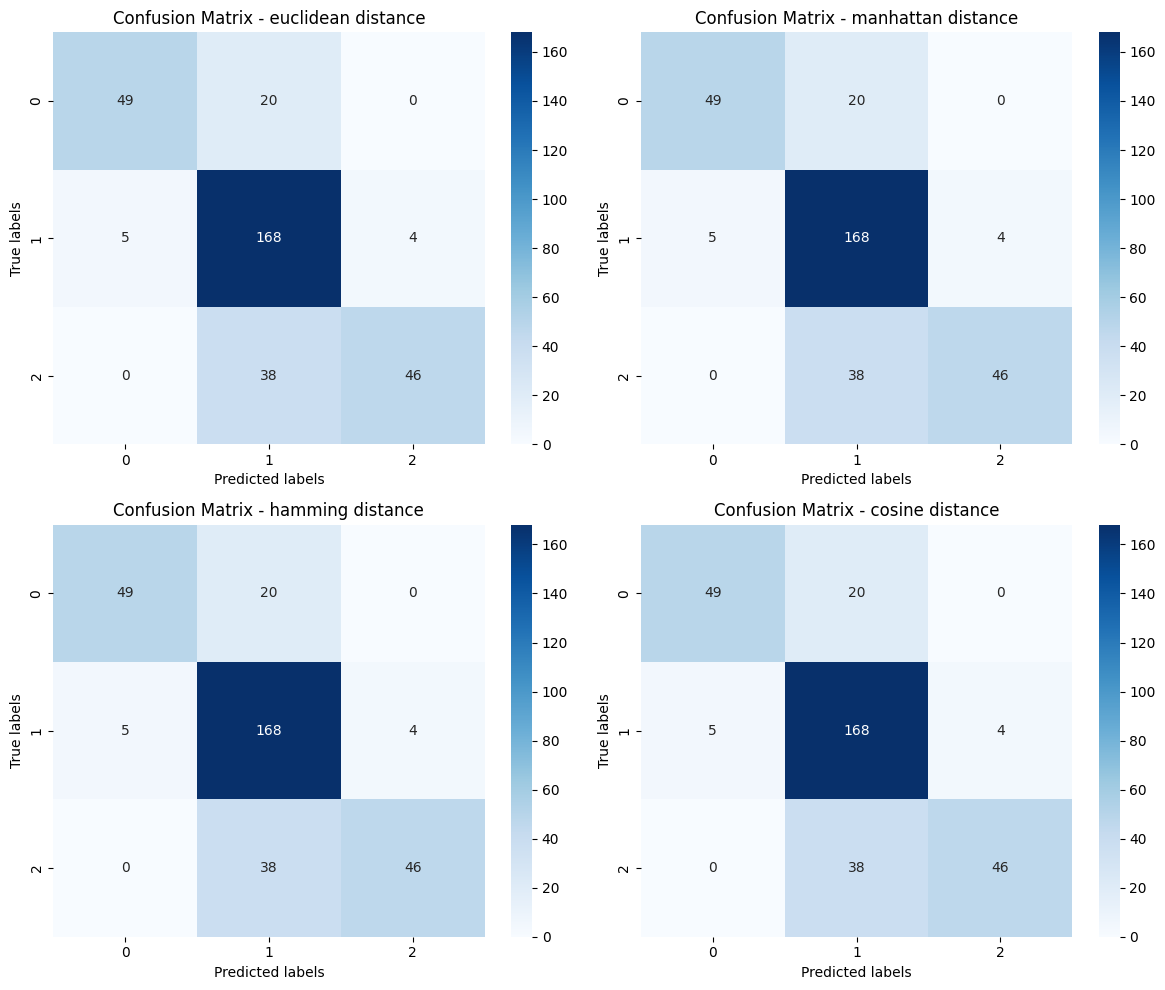

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create a pipeline with SimpleImputer and KNeighborsClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', KNeighborsClassifier())
])

# List of distance metrics
distance_metrics = ['euclidean', 'manhattan', 'hamming', 'cosine']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, metric in enumerate(distance_metrics):
    # Set up grid with 5-fold cross-validation
    param_grid_knn = {'classifier__n_neighbors': [1, 2, 3, 5, 6, 7, 9, 11, 13], 'classifier__weights': ['uniform', 'distance']}
    knn = KNeighborsClassifier(metric=metric)
    grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search_knn.fit(X_train_scaled, y_train)
    y_pred_knn = grid_search_knn.predict(X_test_scaled)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_knn)

    # Plot confusion matrix using Seaborn
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {metric} distance')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()

In [ ]:
'''from sklearn.model_selection import GridSearchCV

# List of distance metrics
distance_metrics = ['euclidean', 'manhattan', 'hamming', 'cosine']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, metric in enumerate(distance_metrics):
    # K-Nearest Neighbors (KNN) with GridSearchCV for each distance metric
    param_grid_knn = {'n_neighbors': [1, 2, 3, 5, 6, 7, 9, 11, 13], 'weights': ['uniform', 'distance']}
    knn = KNeighborsClassifier(metric=metric)
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', return_train_score=False, verbose=1)
    grid_search_knn.fit(X_train_scaled, y_train)
    y_pred_knn = grid_search_knn.predict(X_test_scaled)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_knn)

    # Plot confusion matrix using Seaborn
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {metric} distance')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout()
plt.show()'''

In [ ]:
for metric in distance_metrics:
    # Initialize the KNN classifier with the specified distance metric
    knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_classifier.fit(X_train, y_train)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nResults for {metric} distance:")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=dt_model.classes_)

y_pred_prob = dt_model.predict_proba(X_test)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(dt_model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Epoch 1/10
200/200 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0098 - val_loss: nan - val_accuracy: 0.0131
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 6/10
200/200 [==============================] - 2s 11ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0097 - val_loss: nan - val_accuracy: 0.0131
Epoch 8/10
200/200 [===========================

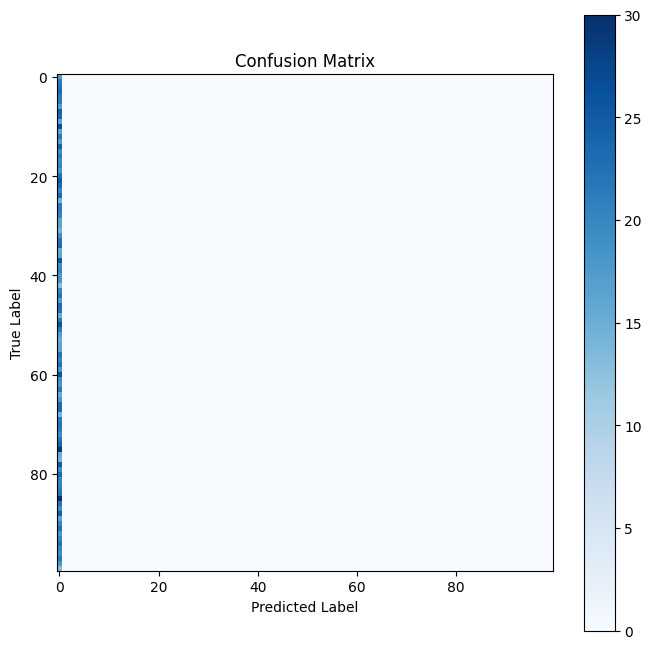

Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.02        17
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        16
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        21
    

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = len(set(y))

# Neural Network Architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, tf.keras.utils.to_categorical(y_train, num_classes=num_classes), epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the Model
y_pred_prob = model.predict(X_test)

# Convert true labels to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=range(num_classes))

# Calculate accuracy
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate with classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Convert the categorical features to one-hot encoding
encoder = OneHotEncoder()
X = encoder.fit_transform(iris.data[:, :2]).toarray()
y = iris.target
y_one_hot = encoder.fit_transform(iris.data[:, 2:]).toarray()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SimpleImputer with a strategy of replacing missing values with the mean
imputer = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True, add_indicator=False, fill_value=None, verbose=0)

# Initialize the KNeighborsClassifier with the specified distance metric
metric = 'euclidean'
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric=metric)

# Create a pipeline with the SimpleImputer and KNeighborsClassifier
knn_pipeline = Pipeline(steps=[('imputer', imputer), ('knn', knn_classifier)])

# Fit the pipeline to the training data
knn_pipeline.fit(X_train, y_train)

# Calculate the predicted probabilities for each class using the KNeighborsClassifier pipeline
y_pred_prob = knn_pipeline.predict_proba(X_test)

# Convert the categorical labels to one-hot encoding
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Remove rows with NaN values in y_pred_prob
y_pred_prob_clean = y_pred_prob[~np.isnan(y_pred_prob).any(axis=1)]
y_test_clean = y_test_one_hot[~np.isnan(y_pred_prob_clean).any(axis=1)]

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_clean[:, i], y_pred_prob_clean[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Mult

SyntaxError: unterminated string literal (detected at line 69) (<ipython-input-8-90aa347ec54a>, line 69)

In [ ]:
# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

ValueError: Input contains NaN.